In [ ]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
from keras.applications.mobilenet import MobileNet

In [ ]:
pickle_in=open('/content/drive/My Drive/CLASS Project/balanced_image_data.pickle','rb')
dataset=pickle.load(pickle_in)
pickle_in.close()
dataset=np.array(dataset)
print(dataset.shape)
dataset=dataset/255.0
dataset=np.repeat(dataset,3,-1)
print(dataset.shape)



dataset=dataset.reshape((10342,100,100,3))
print(dataset.shape)

(10342, 100, 100)
(10342, 100, 300)
(10342, 100, 100, 3)


In [ ]:
pickle_in=open('/content/drive/My Drive/CLASS Project/balanced_label.pickle','rb')
label=pickle.load(pickle_in)
pickle_in.close()
label=np.array(label)

In [ ]:
IMG_SIZE=[100,100]
mob=MobileNet(input_shape=IMG_SIZE+[3],weights='imagenet',include_top=False)

for layer in mob.layers:
  layer.trainable=False
x=Flatten()(mob.output)
prediction=Dense(3,activation='softmax')(x)
model = Model(inputs=mob.input, outputs=prediction)

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 101, 101, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 50, 50, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 50, 50, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 50, 50, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 50, 50, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 50, 50, 32)       

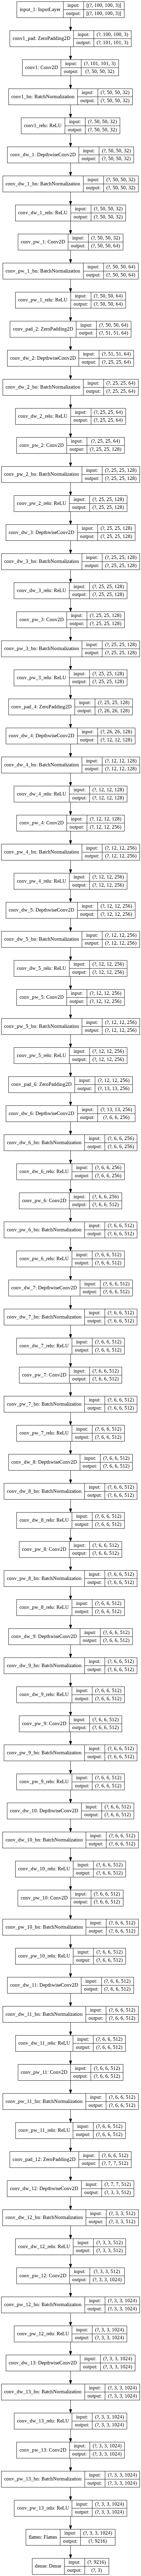

In [ ]:
keras.utils.plot_model(model,to_file='/content/drive/My Drive/CLASS Project/MobileNet.png',show_shapes=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,label,stratify=label,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307,)
(1035,)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307, 3)
(1035, 3)


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
hist=model.fit(X_train,y_train,epochs=20,validation_split=0.1,verbose=1)

Epoch 1/20
262/262 [==============================] - 3s 13ms/step - loss: 93.6900 - accuracy: 0.6553 - val_loss: 47.3542 - val_accuracy: 0.6380
Epoch 2/20
262/262 [==============================] - 3s 10ms/step - loss: 91.3505 - accuracy: 0.6701 - val_loss: 100.3177 - val_accuracy: 0.6391
Epoch 3/20
262/262 [==============================] - 3s 10ms/step - loss: 96.9515 - accuracy: 0.6652 - val_loss: 93.2302 - val_accuracy: 0.6391
Epoch 4/20
262/262 [==============================] - 3s 10ms/step - loss: 78.5241 - accuracy: 0.6588 - val_loss: 213.8703 - val_accuracy: 0.6960
Epoch 5/20
262/262 [==============================] - 3s 10ms/step - loss: 99.4224 - accuracy: 0.6611 - val_loss: 12.9688 - val_accuracy: 0.6982
Epoch 6/20
262/262 [==============================] - 3s 10ms/step - loss: 72.0396 - accuracy: 0.6606 - val_loss: 69.8096 - val_accuracy: 0.6391
Epoch 7/20
262/262 [==============================] - 3s 10ms/step - loss: 94.8535 - accuracy: 0.6699 - val_loss: 106.7309 - val

In [ ]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 0s 14ms/step - loss: 24.2817 - accuracy: 0.6589


[24.28173065185547, 0.6589372158050537]

In [ ]:
a=X_test[555]
print(a.shape)
a=np.expand_dims(a,0)

(100, 100, 3)


In [ ]:
y_test[555]

array([0., 0., 1.], dtype=float32)

In [ ]:
print(np.argmax(model.predict(a))+1)

3


In [ ]:
model.save('/content/drive/My Drive/CLASS Project/MobileNet.h5')

Text(0.5, 0, 'accuracy')

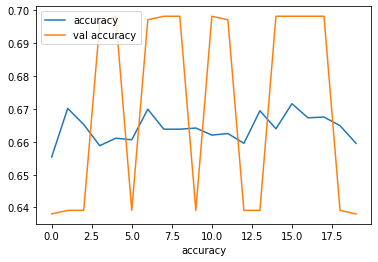

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('accuracy')

Text(0.5, 0, 'loss')

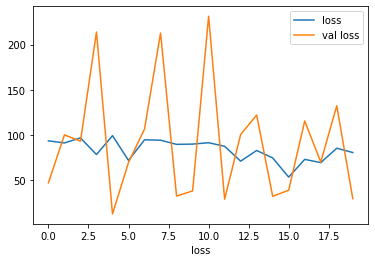

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('loss')